# Virgo Cluster

### Introduction
This project is part of the AST222 course at the University of Toronto.

Clusters of Galaxies are the largest Virialized structures in the Universe: they have fallen out of the Hubble Flow and are supported against further collapse by the kinetic energy in their particles. We’re not actually part of a
cluster ourselves, instead being part of the much more modest Local Group. The nearest cluster is the Virgo Cluster, which is typical of a large, evolved cluster. It is made up of $n \sim 1500$ large galaxies and has a mass of
roughly $M \sim 10^{15} M_\odot$\. An image of the Virgo Cluster is shown below, courtesy of [NASA](https://science.nasa.gov/virgo-cluster-galaxies).

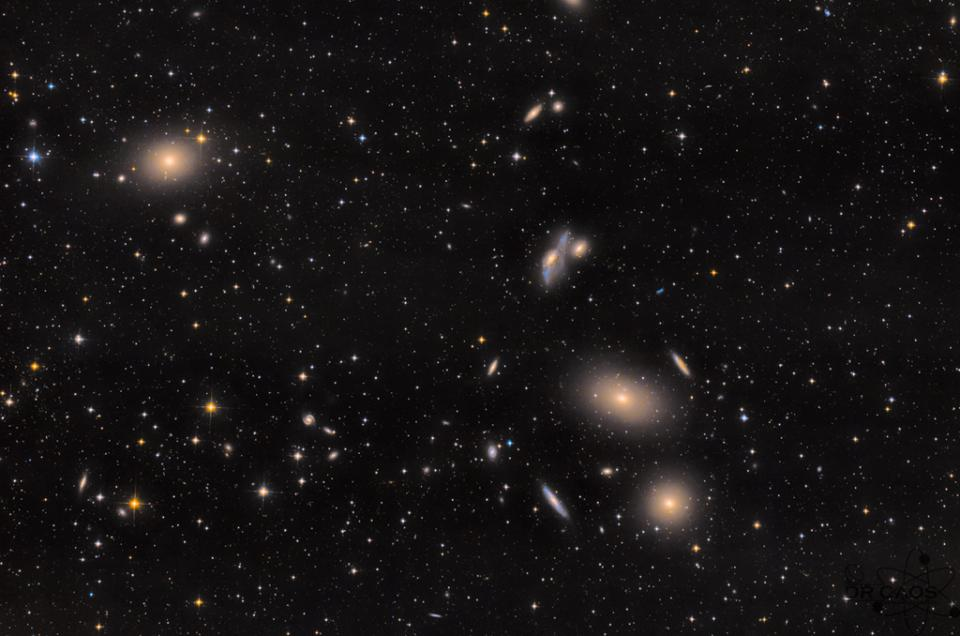

In this question, we are going to study the positions and velocities of 1589 galaxies in the Virgo Cluster, and use this large dataset to estimate properties of Virgo, such as the redshift, distance, size, and mass. This data comes from the [Extended Virgo Cluster Catalogue (EVCC)](https://https://cdsarc.cds.unistra.fr/viz-bin/cat/J/ApJS/215/22), with data from the Sloan Digital Sky Survey (SDSS).

First, let's load some relevant packages

In [3]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import QTable
from astropy.utils.masked import Masked
from astropy.visualization import quantity_support
import astropy.units as u
from astropy import constants as const

quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fd14c6fd5d0>

Next, we'll load the file of the galaxy velocities.

In [4]:
# We load the data from the asu.fit file. Set the path to the location of the file on your computer.

table = QTable.read('asu.fit', astropy_native=True, memmap=True)

# Here, we store the velocities data in an array called "velocities", removing any values that are NaN
velocities = table["cz"]
velocities = velocities[~np.isnan(velocities)]

# Here, we store the locations of the galaxies in angular coordinates, 
# with the right ascension stored in "ra", and the declination stored in "dec"
ra = table['RAJ2000']
dec = table['DEJ2000']

### Part A: Plotting

Create a histogram of the galaxy velocities, using the plt.hist() function, with 30 bins. Also, create a scatter plot of the right ascension and declination, showing the locations of the galaxies as they would look on the sky.

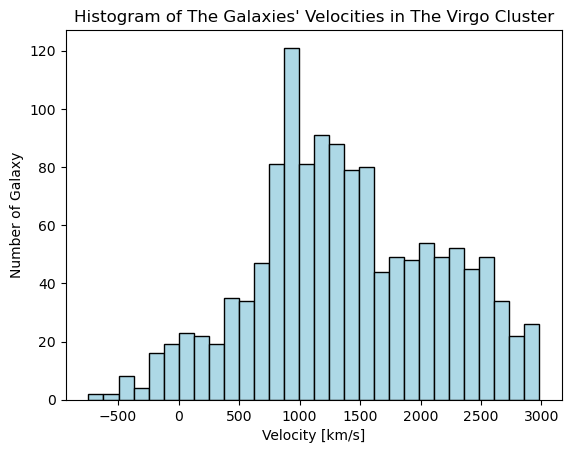

In [5]:
# Create the histogram
plt.hist(velocities, bins = 30, color = 'lightblue', edgecolor = 'black')
plt.title('Histogram of The Galaxies\' Velocities in The Virgo Cluster')
plt.xlabel('Velocity [km/s]')
plt.ylabel('Number of Galaxy')
plt.show()

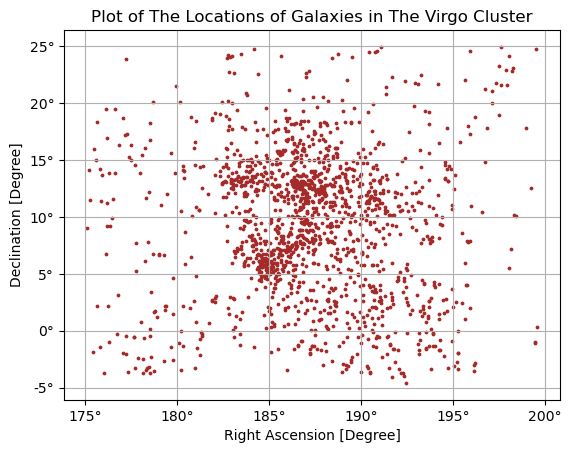

In [6]:
# Create the scatter plot of the galaxy locations in this cell
fig = plt.figure()
plt.scatter(ra, dec, color = 'brown', s = 3)
plt.title('Plot of The Locations of Galaxies in The Virgo Cluster')
plt.xlabel('Right Ascension [Degree]')
plt.ylabel('Declination [Degree]')
plt.grid(True)
plt.show()

### Part B: Redshift and Distance

Calculate the average velocity of the Virgo cluster galaxies, using the average redshift of the galaxies.
Next, calculate the angular diameter distance to the Virgo cluster, using Hubble's law and the cosmological distance relations.

In [7]:
# Calculate the average velocity of the Virgo cluster using this cell
mean_vel = np.mean(velocities)
print('The mean velocities of the galaxies in the Virgo cluster is ', mean_vel)

The mean velocities of the galaxies in the Virgo cluster is  1392.23193359375 km / s


In [8]:
# Estimate the angular diameter distance using this cell. The hubble constant and the speed of light are given below
H0 = 70*u.km/u.s/u.Mpc
c  = const.c

# First, find the proper distance D from Hubble's law D = v/H_0 
mean_vel_m  = mean_vel * 1000 *u.meter / (1 * u.km)
H0_m        = H0.to(u.m/u.s/u.Mpc)
proper_dist = mean_vel_m/H0_m

# Then, look for z = v/c
redshift = mean_vel_m/c

# Then, find the angular diameter distance from the expression D_A = D/(1 + z).
DA = proper_dist / (1 + redshift)
print('The angular diameter distance to the Virgo cluster is ', DA)

The angular diameter distance to the Virgo cluster is  19.797090215887543 Mpc


### Part C: Angular and Physical Separation

Using the coordinates of the galaxies, compute the angular coordinates of the cluster centre, and the average angular seperation from the centre of the  cluster. Then, use the angular diameter distance to compute the average physical seperation from the centre. This gives a rough estimate of the characteristic radius of the cluster.

In [9]:
# Compute the average angular coordinates of the centre of the cluster, assuming a flat sky approximation
mean_ra  = np.mean(ra)
mean_dec = np.mean(dec)
print('The average angular coordinates of the centre of the cluster is RA = ', mean_ra, 'and Declination = ', mean_dec)

The average angular coordinates of the centre of the cluster is RA =  187.19310434235368 deg and Declination =  9.262071302706104 deg


In [14]:
# Compute the angular distances of all the galaxies from the centre, and find the average
def angular_distance(ra, dec, mean_ra, mean_dec):
    ang_dist = np.sqrt((mean_ra - ra)**2 + (mean_dec - dec)**2)
    return ang_dist
ang_dist = angular_distance(ra, dec, mean_ra, mean_dec)
mean_ang_dist = np.mean(ang_dist)
print('The average angular distances of all galaxies from the centre of the cluster is ', mean_ang_dist)

The average angular distances of all galaxies from the centre of the cluster is  6.381669152983024 deg


In [15]:
# Use the average angular seperation of galaxies from the cluster centre to estimate the physical average seperation from the centre, using the angular diameter distance
from astropy.coordinates import Angle
def physical_separation(ang_dist, DA):
    ang_dist_rad = (Angle(ang_dist, u.degree)).radian
    phys_sep = ang_dist_rad * DA
    return phys_sep
phys_sep = physical_separation(mean_ang_dist, DA)
print('The physical average separation or the characteristic radius of all galaxies from the centre of the cluster is ', phys_sep)

The physical average separation or the characteristic radius of all galaxies from the centre of the cluster is  2.2050224470845143 Mpc


### Part D: Velocity Dispersion

Calculate the velocity dispersion of the Virgo cluster.

Also write down an expression for the kinetic energy in terms of the total mass and the velocity dispersion.
You should make the simplifying assumption that all member galaxies are the same mass, $m_i = M/n$.

In [16]:
# Calculate the velocity dispersion of the galaxies using this cell
vel_dispersion = np.std(velocities)
print('The velocity dispersion of Virgo cluster is ', vel_dispersion)

# Express the kinetic energy in terms of the total mass and the velocity dispersion assuming all member galaxies are the same mass
def kinetic_energy(total_mass, vel_dispersion):
    return 0.5 * total_mass * vel_dispersion**2

The velocity dispersion of Virgo cluster is  764.4844970703125 km / s


### Part E: Energy and Mass

Find the total mass of the cluster!

You can start by taking the gravitational potential of the cluster to be given by the formula
$$
U = - \frac{3\pi GM^2}{32 a_P}
$$
(i.e., a Plummer potential),
where $a_p$ is the characteristic radius of the cluster.

Next, relate this to the the velocity dispersion calculated above using the Virial Theorem,
and rearrange to solve for mass.

Plug in the values you calculated above to find the total mass of the Virgo cluster!
Please express you answer in solar masses (this is easily done with astropy's unit conversions,
e.g. with `.to(u.solMass)`).


##### Finding the expression for the total mass
Start by relating the kinetic energy from part D with the Plummer potential through thr Virial Theorem

\begin{align*}
U = -2K\\
\frac{3\pi GM^2}{32a_{P}} = 2\frac{1}{2}Mv^2\\
M = \frac{32}{3} \frac{v^2 a_{P}}{\pi G}
\end{align*}




In [17]:
# Use this cell to calculate the total mass of the Virgo cluster, assuming a Plummer potential
# and your equation above for the kinetic energy of the cluster. The gravitational constant, G, is given below
def total_mass(vel_dispersion, phys_sep):
    G  = const.G
    v  = vel_dispersion * 1000 *u.meter / (1 * u.km)
    ap = phys_sep.to(u.meter)
    M = 32/3 * (v**2 * ap)/(np.pi * G)
    return M.to(u.solMass)

m = total_mass(vel_dispersion, phys_sep)
print('The total mass of Virgo cluster is ', "{:e}".format(m))

The total mass of Virgo cluster is  1.017345e+15 solMass


### Part F: Discussion

Throughout this calculation, we made a number of assumptions and approximations in order to estimate the total mass of the Virgo cluster. Briefly discuss three assumptions or approximations that were made, estimate how much they would impact our final answer, and explain whether you think each of these approximations would make our estimate of the mass higher or lower. Your total answer should be no greater than 300 words.

###### The three approximations, what are they?
1. Flat sky approximation. The sky forms a sphere around us. When we examine phenomena like the CMB or the distribution of galaxies across the sky, we're looking at patterns spread across this sphere. However, for a small enough piece of the sky, we can approximate this patch as being flat rather than curved.
2. All member galaxies are the same mass.
3. Plummer potential. The Plummer potential is a mathematical model used to approximate the gravitational effects of a spherically symmetric mass distribution under certain idealized conditions. These conditions include spherical symmetry, smooth mass distribution, static configuration, homogeneity, and finite central density.

###### How would they impact our estimate of the mass?
1. Flat sky approximation. From its definition, since we assume that the sky is flat, there are several galaxies that should be closer than what we calculated. Because of this approximation, the distance that we calculate is going to be further than it should be. Since the total mass is proportional to the distance, this would make our estimated mass higher than it should be.
2. This approximation is a crucial one because it allows us to pull the total mass out of the equation and allow us to use the unweighted kinetic energy. However, this approximation would make our estimated mass higher than it should be since it may include those galaxies that are relatively stationary.
3. The expression of the Plummer potential is 3$\pi$/32 times the general expression of gravitational potential. In the expression of the total mass, this constant will be rearranged to 32/3$\pi$, making our estimated mass bigger than it should be.